Importing adata_qc variable

In [1]:
import scanpy as sc
import pandas as pd

adata_qc = sc.read_h5ad(r"C:\Users\jtspy\OneDrive\Desktop\PersonalProject\NSCLC_Project\NSCLC-scRNA-Analysis\data\raw\figshare\qc_filtered.h5ad")

Normalizing total counts per cell

In [2]:
sc.pp.normalize_total(adata_qc, target_sum=1e4)

Log transformation

In [3]:
sc.pp.log1p(adata_qc)

Identify highly variable genes

In [4]:
sc.pp.highly_variable_genes(adata_qc, n_top_genes=3000, flavor="seurat_v3")

C:\Users\jtspy\AppData\Local\Temp\ipykernel_16704\2354466313.py:1: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  sc.pp.highly_variable_genes(adata_qc, n_top_genes=3000, flavor="seurat_v3")


Inspecting HVGs

In [5]:
adata_qc.var["highly_variable"].value_counts()

highly_variable
False    69131
True      3000
Name: count, dtype: int64

Subset HVGs
- Capture the most biological signal as PCA on all genes is slow and noisy

In [6]:
adata_qc = adata_qc[:, adata_qc.var["highly_variable"]]

Scale data
- Centers genes to mean 0
- scales to unit variance
- clips extreme values to avoid domination

In [7]:
sc.pp.scale(adata_qc, max_value=10)

C:\Users\jtspy\AppData\Local\Python\pythoncore-3.14-64\Lib\functools.py:982: UserWarning: Received a view of an AnnData. Making a copy.
  return dispatch(args[0].__class__)(*args, **kw)
C:\Users\jtspy\AppData\Local\Python\pythoncore-3.14-64\Lib\functools.py:982: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


PCA

In [8]:
sc.tl.pca(adata_qc, svd_solver="arpack")

Inspect variance

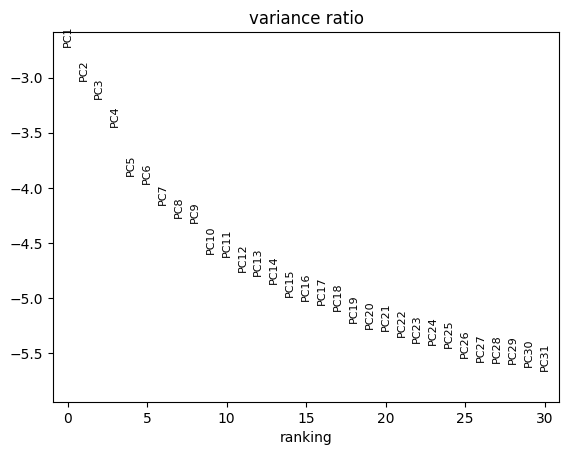

In [9]:
sc.pl.pca_variance_ratio(adata_qc, log=True)

In [10]:
adata_qc.write(r"C:\Users\jtspy\OneDrive\Desktop\PersonalProject\NSCLC_Project\NSCLC-scRNA-Analysis\data\raw\figshare\adata_pca.h5ad")